# Analysis notebook: `SU2020b_CRY_onspill-LH_aw_test`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_onspill-LH_aw_test"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_onspill-LH_aw_test

analysis.csv  hists.h5	   SU2020b_CRY_onspill-LH_aw_test.log
cut_flow.csv  results.pkl  SU2020b_CRY_onspill-LH_aw_test.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_onspill-LH_aw_test


In [5]:
results = loader.load_pkl() 
# import pandas as pd
# pd.options.display.float_format = '{:.3f}'.format
# pd.options.display.float_format = lambda x: f'{x:,.0f}' if type(int) else f'{x:.3f}' # f'{x:.3f}'
# pd.options.display.float_format = l/ambda x: f'{int(x):,}' if x >= 100 else f'{x:.3f}'
# display(results["analysis"])
# results_from_persistent = loader.load_all() # Persistent backup 
# display(results_from_persistent["analysis"])

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_onspill-LH_aw_test/results.pkl


## Analyse results

### Cut flow

In [6]:
# passEntrance_And_EMinusFit: pass=2960    all=3133    -- eff=94.48 % cumulativ\
# e eff=94.48 %
# pass_upstream: pass=1363    all=2960    -- eff=46.05 % cumulative eff=43.50 %
# pass_trkpid: pass=392    all=1363    -- eff=28.76 % cumulative eff=12.51 %
# pass_trkqual: pass=311    all=392    -- eff=79.34 % cumulative eff=9.93 %
# pass_t0  : pass=247    all=311    -- eff=79.42 % cumulative eff=7.88 %
# pass_t0err: pass=233    all=247    -- eff=94.33 % cumulative eff=7.44 %
# pass_nactive: pass=230    all=233    -- eff=98.71 % cumulative eff=7.34 %
# pass_d0  : pass=68     all=230    -- eff=29.57 % cumulative eff=2.17 %
# pass_tandip: pass=33     all=68     -- eff=48.53 % cumulative eff=1.05 %
# pass_maxr : pass=28     all=33     -- eff=84.85 % cumulative eff=0.89 %
# pass_crv : pass=0     all=28     -- eff=0.00 % cumulative eff=0.00 %
# pass_ext_mom: pass=0     all=0     -- eff=-nan % cumulative eff=0.00 %
# pass_sig_mom: pass=0     all=0     -- eff=-nan % cumulative eff=0.00 %

In [16]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,3133,100,100,No selection applied
1,has_trk_front,Preselect,3068,97.925,97.925,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2960,94.478,96.480,Electron track fits
3,one_reco_electron,Preselect,2474,78.966,83.581,One reco electron / event
4,is_downstream,Preselect,1363,43.505,55.093,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,392,12.512,28.760,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,311,9.927,79.337,Track fit quality > 0.2
7,within_t0,Tracker,247,7.884,79.421,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,234,7.469,94.737,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,231,7.373,98.718,>20 active tracker hits


### Efficiency & rates

In [8]:
# import pandas as pd
# with pd.option_context('display.float_format', '{:.3f}'.format):
# display(results["analysis"])

# why is it formatted so terribly? 
# this worked with a list of dicts, but not a dict of dicts
# Where you display the dataframe:
display(results["analysis"])

# # Format for display
# with pd.option_context('display.float_format', '{:.2e}'.format,
#                        'display.precision', 3,
#                        'display.max_columns', None):
#     display(df)

Window,Wide,Extended,Signal
Generated,"500,000,000","500,000,000","500,000,000"
Selected,28,3,0
Unvetoed,0,0,0
Selection Eff [%],5.60e-06,6.00e-07,0
Selection Eff Err$-$ [%],-9.63e-07,-2.61e-07,0
Selection Eff Err$+$ [%],1.16e-06,4.61e-07,2.00e-07
Veto Eff [%],100,100,0
Veto Eff Err$-$ [%],-3.448,-25,0
Veto Eff Err$+$ [%],0,0,0
Livetime [days],150.614,10.475,1.507


### Histograms

In [9]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw_test/h1o_1x3_mom_windows.png


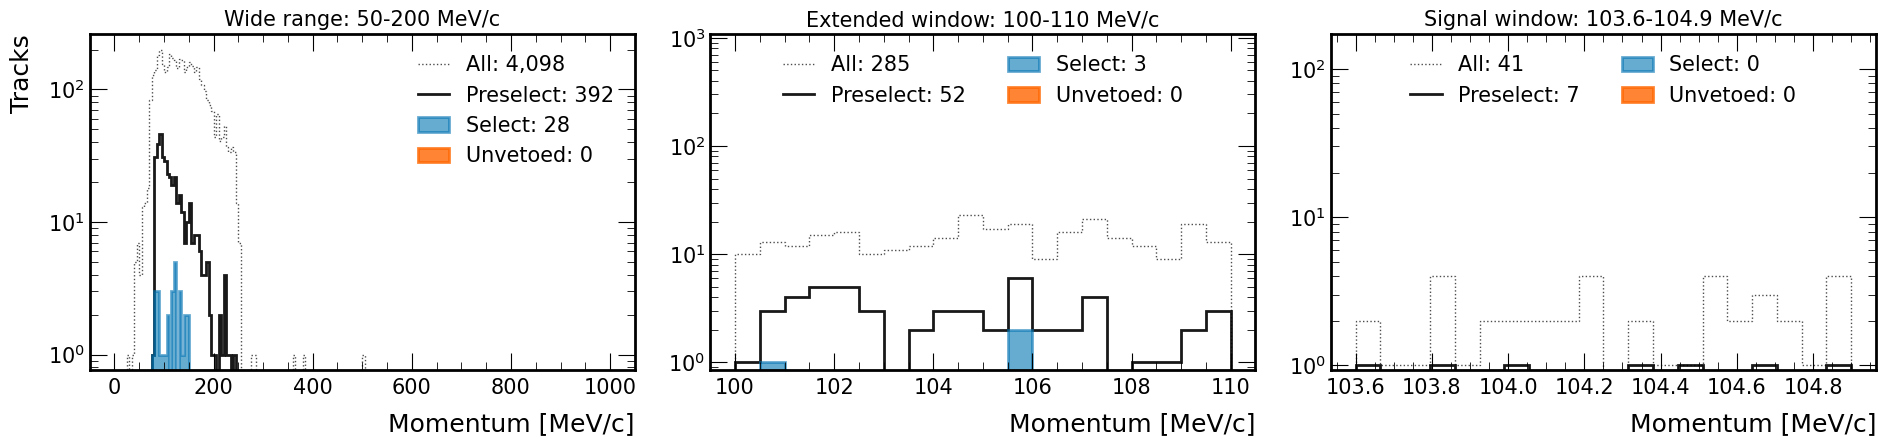

In [10]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw_test/h1o_3x3_summary.png


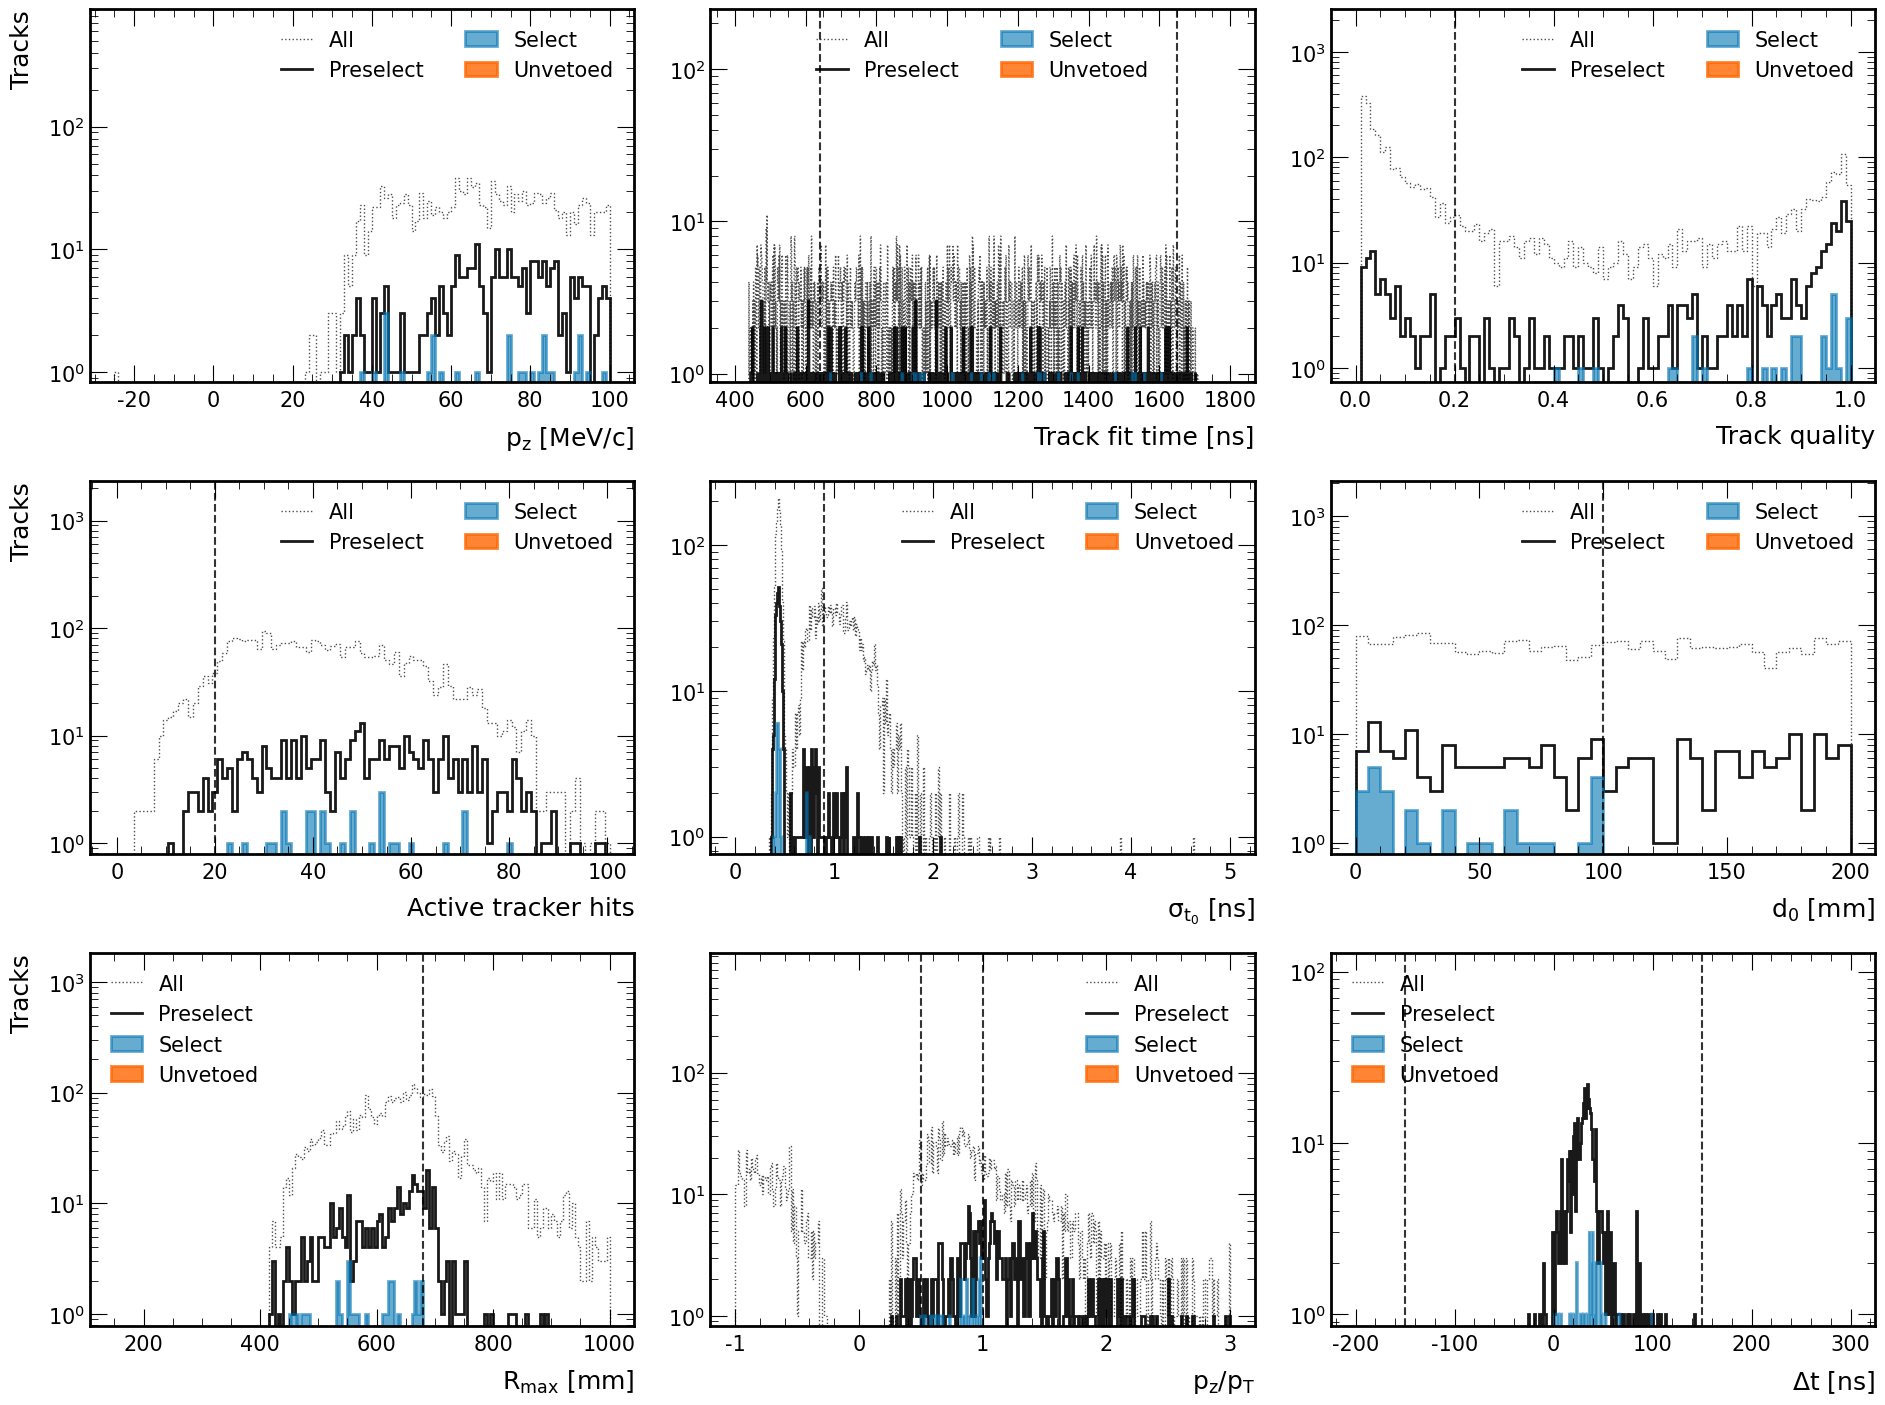

In [11]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw_test/h1o_2x2_mom_summary.png


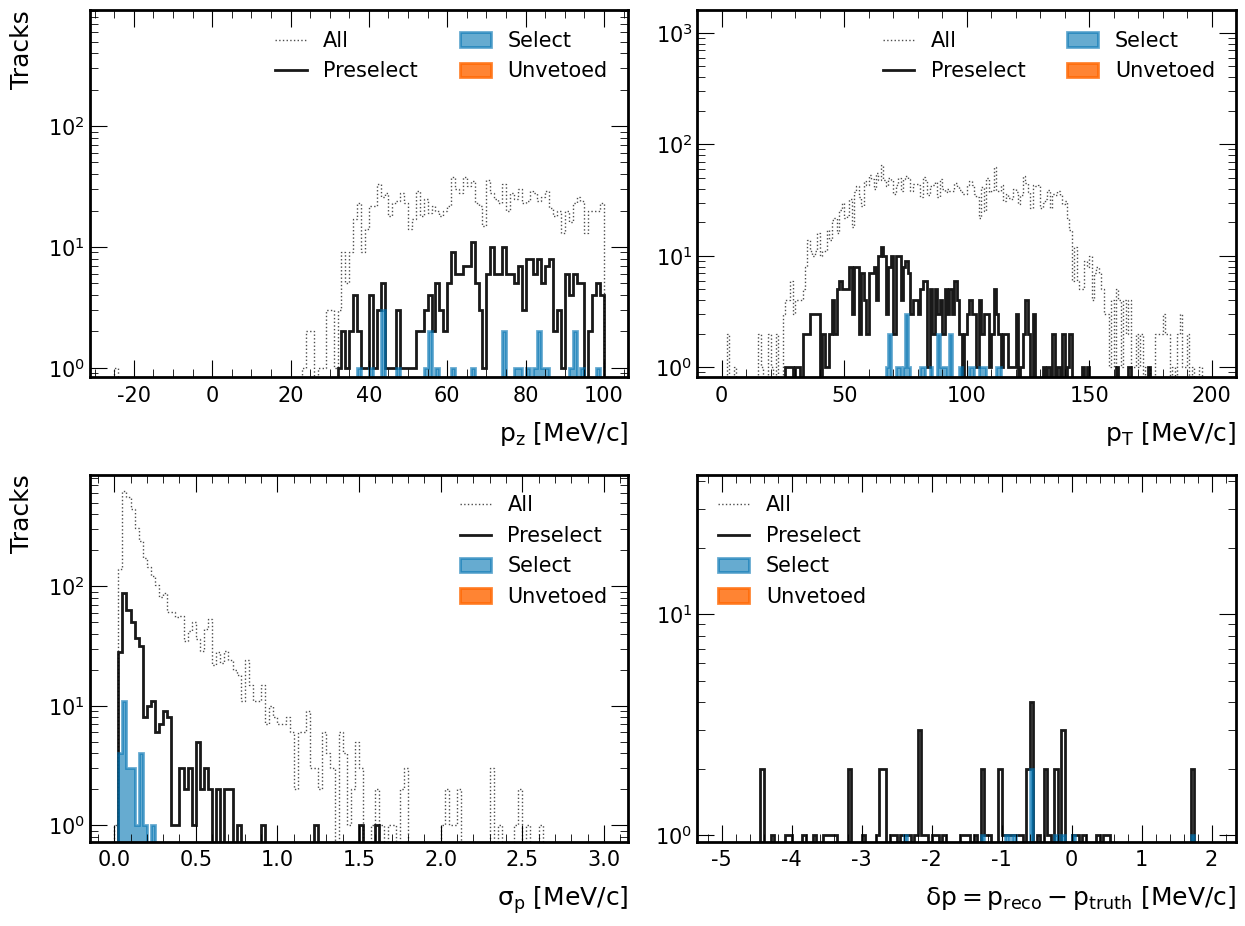

In [12]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw_test/h1o_crv_z.png


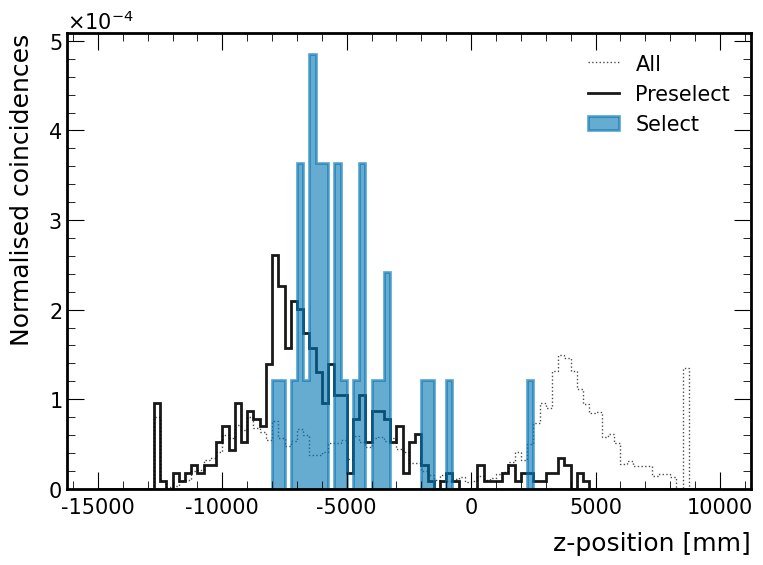

In [13]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [14]:
print(results["event_info"])

In [15]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 0 event(s)...

